# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import matplotlib.ticker as mticker

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable called chipo.

In [56]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
chipo = pd.read_table(url)
chipo.item_price = chipo.item_price.str[1:].astype(float)


### Step 4. See the first 10 entries

In [57]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98
6,3,1,Side of Chips,NaN,1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",9.25


### Step 5. Create a histogram of the top 5 items bought

[Text(0.5, 1.0, "Most ordered Chipotle's Items"),
 Text(0.5, 0, 'Items'),
 Text(0, 0.5, 'Number of Times ordered')]

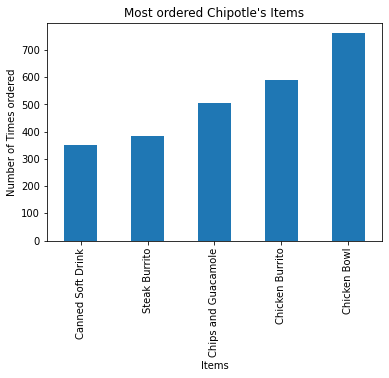

In [65]:

top5 = chipo.groupby('item_name')['quantity'].sum().sort_values().tail(5)

fig, ax = plt.subplots()
# ax.hist(x=top5.index, weights=top5.values)
# ax.set_xticks(np.arange(5))    #else: ax3.yaxis.set_major_locator(mticker.FixedLocator([0, 1, 2, 3, 4]))
# ax.set_xticklabels(labels=top5.index, rotation=90)
#or
ax.bar(top5.index, top5.values)
ax.tick_params(axis='x', labelrotation = 90)
#or
ax.clear()
top5.plot(kind='bar')

ax.set(title="Most ordered Chipotle's Items", xlabel='Items', ylabel='Number of Times ordered')

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

[Text(0.5, 1.0, 'Number of items per price'),
 Text(0.5, 0, 'Order price'),
 Text(0, 0.5, 'Items ordered')]

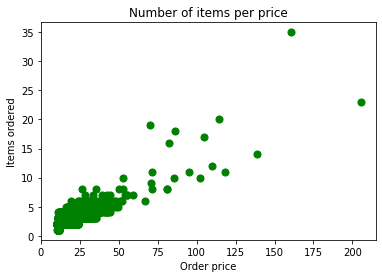

In [68]:
# price_quantity = chipo.groupby('item_price')['quantity'].sum()
# price_quantity
orders = chipo.groupby('order_id').sum()
# print(orders)

fig, ax = plt.subplots()
# ax.scatter(price_quantity.index, price_quantity.values)
# ax.scatter(chipo.item_price, chipo.quantity)
ax.scatter(orders.item_price, orders.quantity, color='g', s=50)
ax.set_xticks(np.arange(0, 225, 25))
ax.set(title="Number of items per price", xlabel='Order price', ylabel='Items ordered')

### Step 7. BONUS: Create a question and a graph to answer your own question.